<a href="https://colab.research.google.com/github/DilakshanMadhusanka/BTD-DM/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dilakshanmadhusanka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


100%|██████████| 15.1M/15.1M [00:00<00:00, 1.41GB/s]

In [ ]:
datapath = '/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'

In [ ]:
categories = os.listdir(datapath)
print(categories)
labels = np.arange(len(categories))
print(labels)
label_dict = dict(zip(categories,labels))
print(label_dict)

['yes', 'no']
[0 1]
{'yes': np.int64(0), 'no': np.int64(1)}


In [ ]:
import cv2
img_size=150

data=[]
target=[]

for category in categories:
    #print(category)
    imgs_path = os.path.join(datapath,category)
    #print(imgs_path)
    img_names = os.listdir(imgs_path)
    #print(img_names)

    for img_name in img_names:
      img_path = os.path.join(imgs_path,img_name)
      #print(img_path)
      try:
          img = cv2.imread(img_path)
          img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
          img = cv2.resize(img,(img_size,img_size))

          data.append(img)
          target.append(label_dict[category])
      except Exception as e:
          print(img_path,e)

In [ ]:
data_new = np.array(data)
target_new = np.array(target)

print(data_new.shape)
print(target_new.shape)

(253, 150, 150)
(253,)


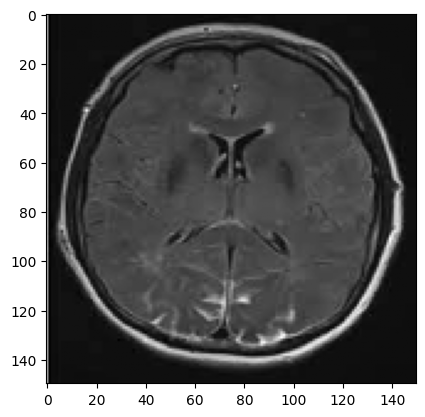

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(data[252],cmap='gray')

In [ ]:
target_new[252]

np.int64(1)

In [ ]:
print(data_new.shape)
print(data_new.shape[0],data_new.shape[1],data_new.shape[2])

(253, 150, 150)
253 150 150


In [ ]:
data_new = data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) #converting to 4D
print(data_new.shape)

(253, 150, 150, 1)


In [ ]:
!pip install keras
data_new = data_new / 255 # normalizing/ scaling

from tensorflow.keras.utils import to_categorical
target_new = to_categorical(target_new)

In [ ]:
print(data_new)
print(target_new)

[[[[0.10588235]
   [0.04705882]
   [0.06666667]
   ...
   [0.05098039]
   [0.05098039]
   [0.10196078]]

  [[0.05098039]
   [0.        ]
   [0.01568627]
   ...
   [0.        ]
   [0.        ]
   [0.04705882]]

  [[0.06666667]
   [0.01176471]
   [0.02745098]
   ...
   [0.01176471]
   [0.01176471]
   [0.06666667]]

  ...

  [[0.05098039]
   [0.        ]
   [0.01176471]
   ...
   [0.        ]
   [0.        ]
   [0.05882353]]

  [[0.05098039]
   [0.        ]
   [0.01176471]
   ...
   [0.        ]
   [0.        ]
   [0.05882353]]

  [[0.10196078]
   [0.04705882]
   [0.06666667]
   ...
   [0.05882353]
   [0.05882353]
   [0.10588235]]]


 [[[0.00392157]
   [0.00392157]
   [0.00392157]
   ...
   [0.01568627]
   [0.04313725]
   [0.04705882]]

  [[0.00392157]
   [0.00392157]
   [0.00392157]
   ...
   [0.05098039]
   [0.01960784]
   [0.04313725]]

  [[0.00392157]
   [0.00392157]
   [0.00392157]
   ...
   [0.04705882]
   [0.04313725]
   [0.03137255]]

  ...

  [[0.00392157]
   [0.00392157]
   [0.0

In [ ]:
np.save('data',data_new)
np.save('target',target_new)

In [ ]:
data = np.load('data.npy')
target = np.load('target.npy')

In [ ]:
print(data.shape)
print(target.shape)

(253, 150, 150, 1)
(253, 2)


In [ ]:
print(data.shape[1:])

(150, 150, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation

model = Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 32)     │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 70, 70, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 33, 33, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 33, 33, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       128,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,982 (1.65 MB)

 Trainable params: 432,982 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(data,target,epochs=20,validation_split=0.2,batch_size=10)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.7856 - loss: 0.7115 - val_accuracy: 0.0000e+00 - val_loss: 1.0602
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7487 - loss: 0.5574 - val_accuracy: 0.0000e+00 - val_loss: 1.5779
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7260 - loss: 0.5922 - val_accuracy: 0.0000e+00 - val_loss: 1.3591
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7394 - loss: 0.5331 - val_accuracy: 0.4902 - val_loss: 1.0774
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8266 - loss: 0.4404 - val_accuracy: 0.1176 - val_loss: 1.5397
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8252 - loss: 0.5175 - val_accuracy: 0.4706 - val_loss: 0.8664
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9017 - loss: 0.3945 - val_accuracy: 0.1373 - val_loss: 1.2506
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8354 - loss: 0.3927 - val_accura

In [ ]:
model.history.history['loss']
model.history.history['val_loss']
model.history.history['accuracy']
model.history.history['val_accuracy']

[0.0,
 0.0,
 0.0,
 0.4901960790157318,
 0.11764705926179886,
 0.47058823704719543,
 0.13725490868091583,
 0.7254902124404907,
 0.6666666865348816,
 0.5098039507865906,
 0.4313725531101227,
 0.37254902720451355,
 0.6470588445663452,
 0.6666666865348816,
 0.5490196347236633,
 0.45098039507865906,
 0.6078431606292725,
 0.6470588445663452,
 0.6274510025978088,
 0.7254902124404907]

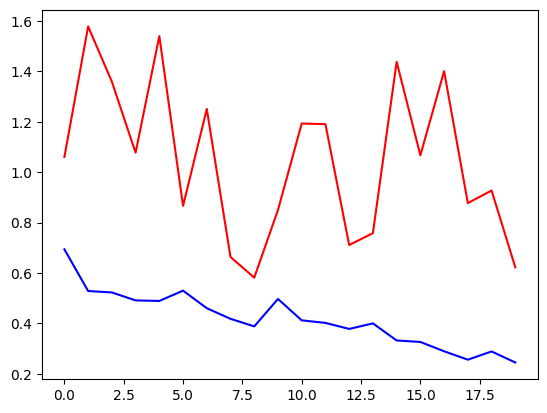

In [ ]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],'b')
plt.plot(model.history.history['val_loss'],'r')

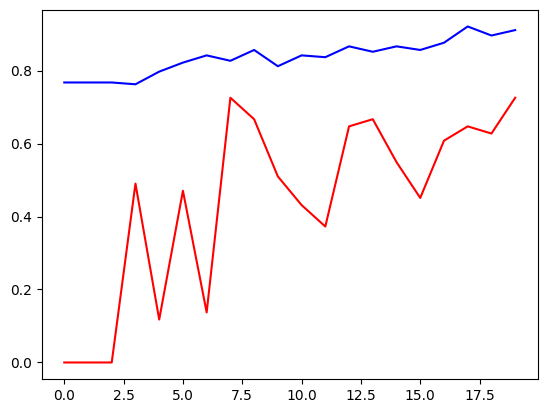

In [ ]:
plt.plot(model.history.history['accuracy'],'b')
plt.plot(model.history.history['val_accuracy'],'r')

In [ ]:
model.save('/content/drive/MyDrive/Deep Learning/brain_tumor_detection.keras')